In this assignment, you will continue to study the data of the US Education System (dataset). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

Does the performance in the exams vary according to gender, origin and education level of parents?

Does lunch type have a relationship with exam performances? How can you explain this, if any?

Does the preparation courses have an impact on exam performance?
Which lessons are most correlated with each other?


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pwd

/Users/charles/origGit/dataScience/magnimindAcademy/data_exploration


In [118]:
df_1 = pd.read_csv('studPerform.csv')

In [119]:
df_1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [120]:
df_1.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [121]:
#Check for missing values
"The number of missing values is ", df_1.isna().sum().sum()

('The number of missing values is ', 0)

In [122]:
df_1.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [123]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [124]:
## Convert objects to categorical

In [125]:
print("Original gender value", df_1.gender.unique())
df_1['gender'] = np.where(df_1.gender=='female',1,0)
print("New Gender Values", df_1.gender.unique())               

Original gender value ['female' 'male']
New Gender Values [1 0]


In [126]:
print("original ethenicity", df_1["race/ethnicity"].unique())
df_1['race/ethnicity'] = df_1["race/ethnicity"].astype('category').cat.codes
print("new race/ethenicity", df_1["race/ethnicity"].unique())

original ethenicity ['group B' 'group C' 'group A' 'group D' 'group E']
new race/ethenicity [1 2 0 3 4]


In [127]:
# When working with categories you can consider granularity.  cominbing group toegether 
# can make it similiar.
print("original parental level of education", df_1["parental level of education"].unique())
def converToCategory(value):
    if "high school" in value:
        return 1
    elif "master" in value:
        return 3
    else: 
        return 2
df_1["parental level of education"] = df_1["parental level of education"].apply(func=converToCategory)
print("The new values are ", df_1["parental level of education"].unique())           

original parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The new values are  [2 3 1]


In [128]:
print("The original values of parental eduction are", df_1["parental level of education"].unique())
df_1["parental level of education"] = df_1["parental level of education"].astype(int)
print("The new values of parental eduction are", df_1["parental level of education"].unique())


The original values of parental eduction are [2 3 1]
The new values of parental eduction are [2 3 1]


In [129]:
print("The original values of test preparation course are", df_1["test preparation course"].unique())
df_1["test preparation course"] = np.where(df_1["test preparation course"]=='completed',1,0)
print("The new values of test preparation course are", df_1["test preparation course"].unique())


The original values of test preparation course are ['none' 'completed']
The new values of test preparation course are [0 1]


In [130]:
print("The original values of lunch is ", df_1.lunch.unique())
df_1.lunch = np.where(df_1.lunch=='standard',1,0)
print("The original values of lunch is ", df_1.lunch.unique())


The original values of lunch is  ['standard' 'free/reduced']
The original values of lunch is  [1 0]


In [136]:
# Verify that the datatypes are integers and floats since correlation only accepts numbers
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int8 
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(7), int8(1)
memory usage: 55.8 KB


## Does the performance in the exams 

vary according to gender, origin and education level of parents?

In [148]:
df_2 = df_1.copy(deep=True)

In [151]:
column_list = df_2.columns.tolist()

In [152]:
df_1.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.518000,2.174000,1.684000,0.645000,0.358000,66.08900,69.169000,68.054000
std,0.499926,1.157179,0.578341,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,1.000000,2.000000,2.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,2.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,3.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [158]:
df_2[column_list].corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.001502,0.050852,-0.021372,-0.006028,-0.167982,0.244313,0.301225
race/ethnicity,0.001502,1.000000,0.116642,0.046563,0.017508,0.216415,0.145253,0.165691
parental level of education,0.050852,0.116642,1.000000,-0.018727,0.000462,0.165983,0.194466,0.240910
lunch,-0.021372,0.046563,-0.018727,1.000000,-0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,0.017508,0.000462,-0.017044,1.000000,0.177702,0.241780,0.312946
math score,-0.167982,0.216415,0.165983,0.350877,0.177702,1.000000,0.817580,0.802642
reading score,0.244313,0.145253,0.194466,0.229560,0.241780,0.817580,1.000000,0.954598
writing score,0.301225,0.165691,0.240910,0.245769,0.312946,0.802642,0.954598,1.000000


<AxesSubplot:>

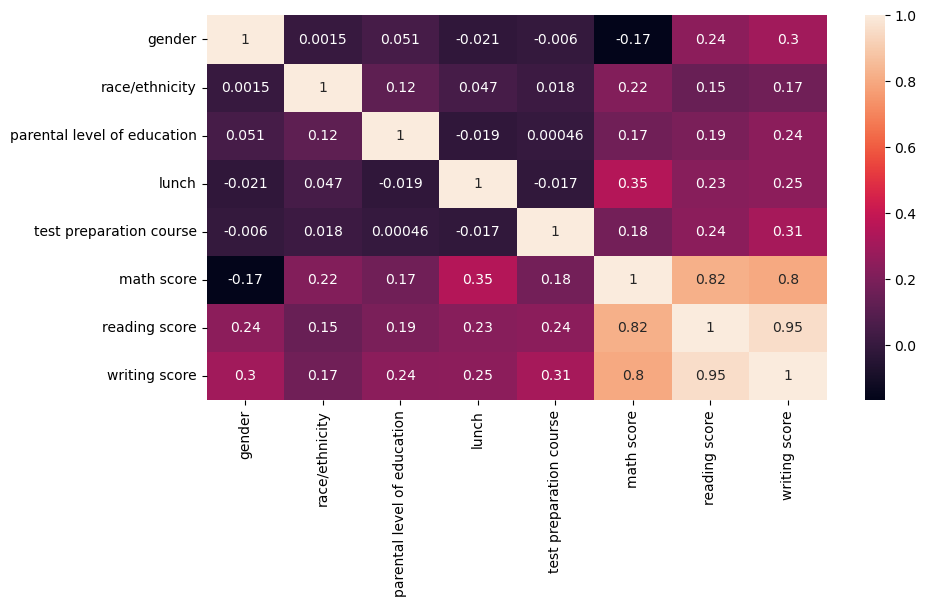

In [156]:
# For the heatamp needed to convert the categorical variables to integer so they would be
# used.
plt.figure(figsize=(10,5))
sns.heatmap(data=df_2[column_list].corr(), annot=True)

<AxesSubplot:>

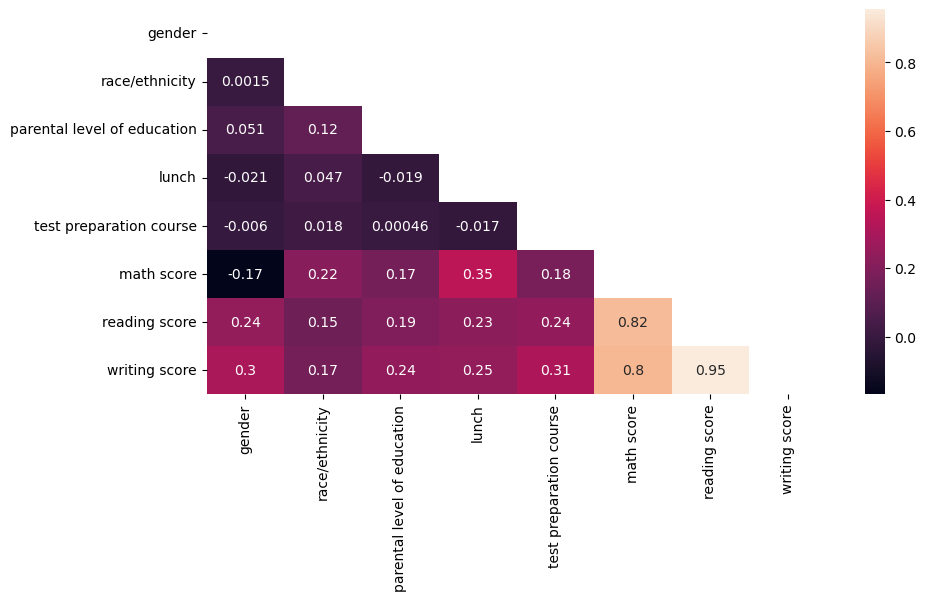

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_2[column_list].corr(), annot=True, mask=np.triu(df_2.corr(),0))

In [ ]:
Question : We have correlation, but how do we do cause and effect
Question about the heat map : gender, math score = .17
For lunch and gender more male got standard lunch
Analysis: 

In [134]:
df_2.describe().T

gender                                      0           1
race/ethnicity              count  482.000000  518.000000
                            mean     2.172199    2.175676
                            std      1.206968    1.110016
                            min      0.000000    0.000000
                            25%      1.000000    1.000000
                            50%      2.000000    2.000000
                            75%      3.000000    3.000000
                            max      4.000000    4.000000
parental level of education count  482.000000  518.000000
                            mean     1.653527    1.712355
                            std      0.567921    0.586998
                            min      1.000000    1.000000
                            25%      1.000000    1.000000
                            50%      2.000000    2.000000
                            75%      2.000000    2.000000
                            max      3.000000    3.000000
lunch                       count  482.000000  518.000000
                            mean     0.655602    0.635135
                            std      0.475665    0.481858
                            min      0.000000    0.000000
                            25%      0.000000    0.000000
                            50%      1.000000    1.000000
                            75%      1.000000    1.000000
                            max      1.000000    1.000000
test preparation course     count  482.000000  518.000000
                            mean     0.360996    0.355212
                            std      0.480788    0.479040
                            min      0.000000    0.000000
                            25%      0.000000    0.000000
                            50%      0.000000    0.000000
                            75%      1.000000    1.000000
                            max      1.000000    1.000000
math score                  count  482.000000  518.000000
                            mean    68.728216   63.633205
                            std     14.356277   15.491453
                            min     27.000000    0.000000
                            25%     59.000000   54.000000
                            50%     69.000000   65.000000
                            75%     79.000000   74.000000
                            max    100.000000  100.000000
reading score               count  482.000000  518.000000
                            mean    65.473029   72.608108
                            std     13.931832   14.378245
                            min     23.000000   17.000000
                            25%     56.000000   63.250000
                            50%     66.000000   73.000000
                            75%     75.000000   83.000000
                            max    100.000000  100.000000
writing score               count  482.000000  518.000000
                            mean    63.311203   72.467181
                            std     14.113832   14.844842
                            min     15.000000   10.000000
                            25%     53.000000   64.000000
                            50%     64.000000   74.000000
                            75%     73.750000   82.000000
                            max    100.000000  100.000000

In [179]:
df_2['math score'].replace(0,1,inplace=True)

[]

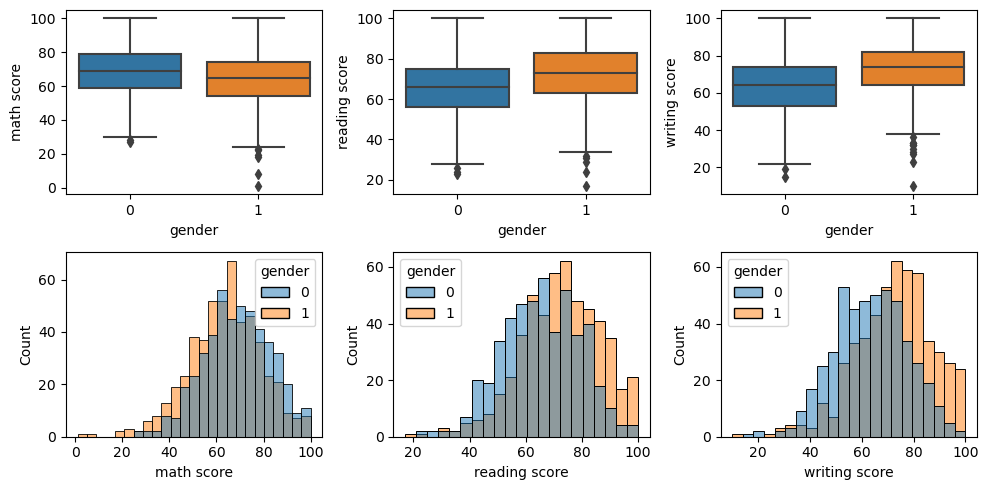

In [205]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
sns.boxplot(x='gender', y='math score', data=df_2)
plt.subplot(2,3,4)
sns.histplot(x='math score', hue='gender',data=df_2)

plt.subplot(2,3,2)
sns.boxplot(x='gender', y='reading score', data=df_2)
plt.subplot(2,3,5)
sns.histplot(x='reading score', hue='gender',data=df_2)

plt.subplot(2,3,3)
sns.boxplot(x='gender', y='writing score', data=df_2)
plt.subplot(2,3,6)
sns.histplot(x='writing score', hue='gender',data=df_2)

plt.tight_layout()

plt.plot()


Analysis:
    
Can use boxplot since math score is continous and numerical and gender divides into 2 
catgories

histogram : To divide the historgram into different categories set hue to a categorical
variable,  Not the gender who is better appear on right side more than the left.  
Histogram is poor man hypothsis testing.  It will show if if the distirbutions are similar
or not.

Heat Map give you a numerical correlation
If you numerical continous use histogram or boxplot
If you discrete or categorical use bar chart to see the ratio

For Univariate Analysis look at the columns individually.  Use the mean/median/standard
distribtuion 

Next Step -- See what column is related to next column.  What problems are corrlated 
Find the most relavent columns and train the output.  Irreviliant column can worsen
machine learning -- How do you do multivariate 


Females got more score in reading/writing and males got more score in math

In [135]:
### Analysis by looking at the mean first and then standard deviation
### All Standard deviations were close so it came down to the mean.
Reading -- Female has the advantage
Writing -- Female has the advantage
Math    -- Male has the advantage

SyntaxError: invalid syntax (2686518876.py, line 3)

### Education Level

In [ ]:
df_3 = df_1.groupby("parental level of education")
df_3.describe()
df_3.boxplot(figsize=(10,20))

In [ ]:
df_3.describe().T

There are 500 records and less then 3% so I will ignore the outliers.

The master had the best results across the board 

The bachelors was next, but the associates degree was close being and
did a little better in math.  Also some collage came close, but they did poorer in math.

Interesting some high school did better than high school.  

Though further study is needed.  What is signle factor is it access
to paid teachers or the parent help them with their homework mroe.

In [ ]:
df_3 = df_1.groupby("race/ethnicity")
df_3.boxplot(figsize=(8,10))

In [ ]:
Group A was the lowest and D and C were second tier then group B 
and group was second and E was the best

Though further study is needed.  What culteral factor most affect this
relationship

In [ ]:
## Does lunch type have a relationship with exam performances? 

How can you explain this, if any?


In [ ]:
df_3 = df_1.groupby("lunch")
df_3.boxplot(figsize=(8,5))

In [ ]:
Definitely there is an effect.  My guess, though further is needed,
it might be cause of the social enconimic factors and not so much the 
free lunch.

In [ ]:
## Does the preparation courses have an impact on exam performance?

Which lessons are most correlated with each other?


In [ ]:
## Does lunch type have a relationship with exam performances? 

How can you explain this, if any?


In [ ]:
df_3 = df_1.groupby("test preparation course")
df_3.boxplot(figsize=(8,5))


In [ ]:
# Kendall's will be used since measure how likely it is for two 
# variables to move in the same direction.
df_3.corr(method='kendall')

In [ ]:
The lesson most correlated with each ( I have chosen 80% are higher)

No Preparation Courses : reading/writing
For Preparation Courses: reading/writing